# Inferential Statistics Ia - Frequentism

## Learning objectives

Welcome to the first Frequentist inference mini-project! Over the course of working on this mini-project and the next frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

For working through this notebook, you are expected to have a very basic understanding of:
* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

While it's great if you have previous knowledge about sampling distributions, this assignment will introduce the concept and set you up to practice working using sampling distributions. This notebook was designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. The second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## I An introduction to sampling from the Normal distribution

First, let's explore the ways we can generate the Normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work.

In [127]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

#### 1) Random Variable & Mean, Standard Deviation

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

In [128]:
print(norm.__doc__)

A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, loc=0, scale=1)
        Log of the survival function.
    ppf(q, loc=0, scale

__A:__ The second methods is `pdf(x, loc=0, scale=1)`, which is probability density function. It computes the value of the pdf at point x for a given $\mu$ (loc) and $\sigma$ (scale).

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__ we will use `norm.rvs` to generate five random variates.

In [129]:
seed(47)
# draw five samples here
random_samples = norm.rvs(size = 5)

# view the generation results
print(random_samples)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

__A:__ The mean of the five random samples is 0.19, which is slightly bigger thane the expected mean 0.

In [130]:
# Calculate and print the mean here, hint: use np.mean()
random_samples_mean = np.mean(random_samples)

# print the mean
print('random samples mean: {}'.format(random_samples_mean))

random samples mean: 0.19355593334131074


__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__ The manually computed standard deviation is 0.96.

In [159]:
# define a function to calculate the standrard deviation
def standrad_deviation(data):
    n = len(data)
    var = np.sum((data - np.mean(data))**2)
    std = np.sqrt(var/n)
    return std

# compute the standard deviation

std = standrad_deviation(random_samples)

# print the std
print('random samples standard deviation: {}'.format(std))

random samples standard deviation: 0.9606195639478641


#### 2) Infer Population Parameters from Sample Parameters
#### Bessel's Correction - unbiased estimation of the population variance

Here we have calculated the actual standard deviation of a small (size 5) data set. But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die. In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

##### 2.1) Standard Deviation - Manually Computation


__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [164]:
# define a function to calculate the unbiased standrard deviation
def unbiased_standrad_deviation(data):
    n = len(data)
    var = np.sum((data - np.mean(data))**2)
    std = np.sqrt(var/(n-1))
    return std

# compute the unbiased standard deviation

std = unbiased_standrad_deviation(random_samples)

# print the unbiased std
print('Unbiased standard deviation estimator: {}'.format(std))

Unbiased standard deviation estimator: 1.0740053227518152


##### 2.2) Standard Deviation - `np.std` Computation

__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__ The default `np.std()` function resturns the std of 0.96, withoue bessel's correction.

In [170]:
# compute the standard deviation use np.std function
std_np = np.std(random_samples)

# print the results
print('standard deviation by np.std: {}'.format(std_np))

standard deviation by np.std: 0.9606195639478641


__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__ According to the documentation, we will specify the `ddof` to get the unbiased estimation.

In [134]:
print(np.std.__doc__)


    Compute the standard deviation along the specified axis.

    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.

    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.

        .. versionadded:: 1.7.0

        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. For arrays of
        integer type the default is float64, for arrays of float types it is
        the same as the array type.
    out : ndarray

In [169]:
# compute the unbiased standard deviation use np.std function
std_np_ubs = np.std(random_samples, ddof =1)

# print the results
print('Unbiased standard deviation by np.std: {}'.format(std_np_ubs))

Unbiased standard deviation by np.std: 1.0740053227518152


### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

__You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter__. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your data set _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}

as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting at this point if your sample is your population then you know absolutely everything about your population, there are no probabilities really to calculate and no inference to be done.

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population and the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

You're now firmly in frequentist theory territory. Great work so far! Now let's dive deeper.
<br/><br/>


## II Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. __If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. The Central Limit Theorem (CLT) tells us that such a distribution will approach a normal distribution as $n$ increases.__ For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

Let's give our normal distribution a little flavor. Also, for didactic purposes, the standard normal distribution, with its variance equal to its standard deviation of one, would not be a great illustration of a key point. Let us imagine we live in a town of 50000 people and we know the height of everyone in this town. We will have 50000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

#### 1) Population Distribution

In [136]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

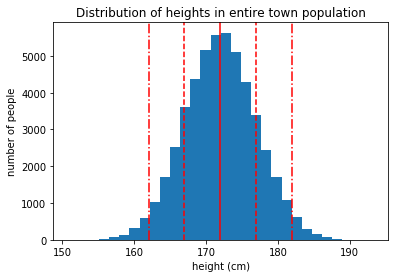

In [137]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

#### 2) Sampling

##### 2.1) Random Sampling 

Now, 50000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [138]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [139]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

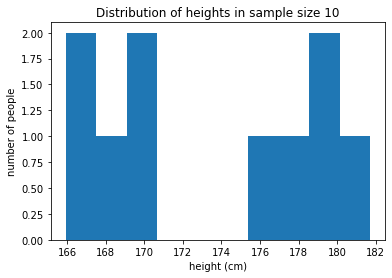

In [140]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean?

In [173]:
# print the mean for the 10 people we sampled
print('sample1 mean: {}'.format(np.mean(daily_sample1)))

sample1 mean: 173.47911444163503


And if we went out and repeated this experiment?

In [174]:
# the 2nd sample
seed(52)
daily_sample2 = townsfolk_sampler(10)

# print the next mean for the 10 people we sampled
print('sample2 mean: {}'.format(np.mean(daily_sample2)))

sample2 mean: 170.06704896003896


###### 2.2) Sampling Distribution - CLT: For a giving repeated sampling, the sampling distribution approaches normal distribution as sample size n increase.

##### 2.2.A) Sample Size n=10

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__ In this section, we will define a function to get the mean for each simulation, then we will visualize the simulated results by histogram.

In [175]:
# define the simulation fucntion with repeated sampling 

def townsfolk_sampler_mean(n, size):
    # initial array for sample mean
    townsfolk_mean = np.empty(size)
    # define the loop for repeating
    for i in range(size):
        townsfolk_mean[i] = np.mean(np.random.choice(pop_heights, n))
    return townsfolk_mean 

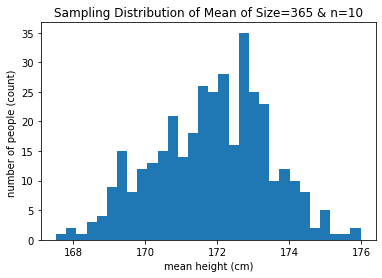

In [176]:
# simulate the results of a daily repeated random trial for a year
seed(47)
yearly_sample1 = townsfolk_sampler_mean(10, 365)

# plot the random trail results 

_ = plt.hist(yearly_sample1, bins=30)
_ = plt.xlabel('mean height (cm)')
_ = plt.ylabel('number of people (count) ')
_ = plt.title('Sampling Distribution of Mean of Size=365 & n=10')
plt.show()


The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q:__ Verify the above results from the CLT.

__A:__ We manually compute the results to verify the Central Limit Theorem. 
<br>
The mean estimators is 171.86, which is very close to the population mean 172.
<br>
The unbiased standard deviation estimator is 1.578 and it's basically the same with the population parameter.

In [177]:
# compute the standard deviation of the sampling distribution of the mean
sampling_mean = np.mean(yearly_sample1)
sampling_std = np.std(yearly_sample1, ddof=1)


# print the results
print('sampling mean: {}'.format(sampling_mean))
print('sampling standard deviation of the sampling mean: {}'.format(sampling_std) )

sampling mean: 171.8660049358649
sampling standard deviation of the sampling mean: 1.5778333114768472


Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

##### 2.2.B) Sample Size n=50

__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__ As the sample size increased, the histogram looks narrower, which also can be verified by the the standard deviation we compute below. Also the mean is closer to the population stats. 

In [178]:
# simulate the results of a daily repeated random trial for a year with bigger sample size of 50
# calculate daily means from the larger sample size here
seed(47)
yearly_sample2 = townsfolk_sampler_mean(50, 365)

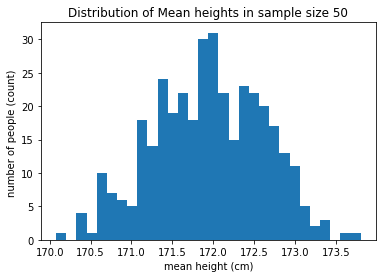

In [180]:
# plot the sampling distribution 

_ = plt.hist(yearly_sample2, bins=30)
_ = plt.xlabel('mean height (cm)')
_ = plt.ylabel('number of people (count) ')
_ = plt.title('Distribution of Mean heights in sample size 50')
plt.show()

In [181]:
# compute the standard deviation of the sampling distribution of the mean
sampling_mean = np.mean(yearly_sample2)
sampling_std = np.std(yearly_sample2)

# print the results
print('sampling mean: {}'.format(sampling_mean))
print('standard deviation of the sampling distribution of the mean: {}'.format(sampling_std) )

sampling mean: 171.94366080916114
standard deviation of the sampling distribution of the mean: 0.6736107539771146


What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.
<br/><br/>

### III Normally testing times!
#### Frequentist Inference

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but you still have to estimate them somehow. If we want to make inferences such as "is this observation unusual?" or "has my population mean changed?" then you need to have some idea of what the underlying distribution is so you can calculate relevant probabilities. In frequentist inference, you use the formulas above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

#### 1)  Empirical rule (68–95–99.7 rule)

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__  The probability of observing the value 1 or less in a single observation from the standard normal distribution is about 0.5 + (0.68/2) = 0.84 - The whole left area lie with 1 as the $+\sigma$. 

In [182]:
seed(47)
std_normal_distribution = norm.rvs(0, 1, size=50000)

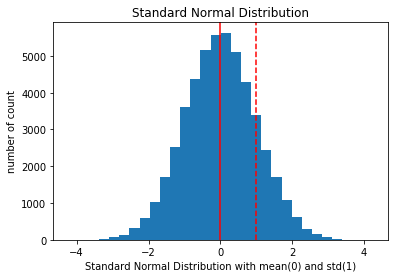

In [183]:
_ = plt.hist(std_normal_distribution, bins=30)
_ = plt.xlabel('Standard Normal Distribution with mean(0) and std(1)')
_ = plt.ylabel('number of count')
_ = plt.title('Standard Normal Distribution')
_ = plt.axvline(0, color='r')
_ = plt.axvline(0 + 1, color='r', linestyle='--')

Calculating this probability involved calculating the area under the pdf from the value of 1 and below. To put it another way, we need to integrate the pdf. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above. One way to do this is using look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__ The the area of chunks of getting a values less than mean$+ \sigma$ from our sample is 0.84.

In [33]:
# use norm.cdf to compute the area from the value 1 and below 
print(norm.cdf(1, loc=0, scale=1))

0.8413447460685429


#### 2) PDF & CDF

__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__ Use the known empirical rule __(`68–95–99.7 rule`)__, the probability of selecting one person at random and their height being 177 cm or less is about 0.84. More specifically, the cdf from the value of mean$+ \sigma$ (172cm + 5 cm) would be 0.5 + (0.68/2) = 0.84.

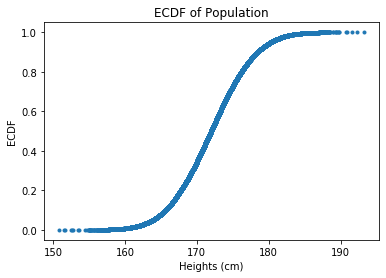

In [202]:
# define the ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

# Plot the ECDF to verify the computation
x, y = ecdf(pop_heights)

_ = plt.plot(x ,y, marker = '.', linestyle ='none') 
#_ = plt.plot(x[np.where(y==177)], 177, 'ro')
_ = plt.xlabel('Heights (cm)')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Population')
plt.show()

we eyeballing when heights is 177 cm, the ECDF are somewhere above 0.8.

In [227]:
# use norm.cdf to compute the area
ecdf_177 = norm.cdf(172+5, loc=172, scale=5)
print('probability of selecting one person at random and their height being 177 cm or less: {:.3f}'.format(ecdf_177))

probability of selecting one person at random and their height being 177 cm or less: 0.841


__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__ We will use the `norm.pdf` to get the probability of randomly picking one person and measure their height and find they are 2.00 m tall. According to the results of a probability of 0.0000000124, it seems that it's highly unlikely to observe a people of height of 2.00 m among our population.

In [228]:
# compute the probability use norm.pdf
p_200 = norm.pdf(200, 172, 5)
print('probability of randomly picking one person of 2.00 m tall: {0:.10f}'.format(p_200))

probability of randomly picking one person of 2.00 m tall: 0.0000000124


#### 3)  $z$-Statistic & $t$-Statistic

We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value. We have essentially just performed a z-test (albeit without having prespecified a threshold for our "level of surprise")!

We're about to come to a pinch, though here. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain.

Above, __we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_.__ This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of __30__ stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

##### Population Parameters Estimator

In [233]:
# We randomly sample the heights of 50 townfolk
seed(47)
# take your sample now
daily_sample3 = townsfolk_sampler(50)

# estimate population mean 
mean_estimator = np.mean(daily_sample3)
print('population mean: {}'.format(mean_estimator))

# unbiased estimate the population standard deviation
std_estimator = np.std(daily_sample3, ddof =1)
print('population standard deviation estimator: {}'.format(std_estimator))

population mean: 172.7815108576788
population standard deviation estimator: 4.195424364433547


Noted that the __Margin of Error__ can be calculated:


\begin{equation}
Margin\;of\;Error = Z * \frac{\sigma}{\sqrt n}
\end{equation}

__Z - Z Score
<br/>
$\sigma$ - Population Standard Deviation
<br/>
n - Sample Size__

Source:
<br/>
https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa-in-python<br/>
https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/standard-error-of-the-mean


In [240]:
# z score
z_score = norm.ppf(0.975)
print('z score: {}'.format(z_score))
n = 50
std_err = std_estimator/np.sqrt(n)

# margin of error
margin_err_z = z_score*std_err
print('margin of error with z statistic:{}'.format(margin_err_z))
# confidence interval
con_int_z = [mean_estimator - margin_err_z, mean_estimator + margin_err_z]
print('confidence intervel with z statistic:{}'.format(con_int_z))

z score: 1.959963984540054
margin of error with z statistic:1.1628909342876539
confidence intervel with z statistic:[171.61861992339115, 173.94440179196644]


__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ To use the $z$ statistic requires we know the true population standard deviation - noted in the calculation above, we use the sample standard deviation as approximate (though the n=30 so the approximate is not bad). 

At this point, we may consider the $t$-statistic as a better approach.

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__ We use the t test from the scipy to compute the results.

In [244]:
# repeat the computation with t value

# critical value
df = len(daily_sample3)-1
crit_val = t.ppf(.975, df)
print('critical value: {}'.format(crit_val))

# std_err = std_estimator/np.sqrt(n)
# margin of error
margin_err_t = crit_val*std_err
print('margin of error with t statistic:{}'.format(margin_err_t))
# confidence interval
con_int_t = [mean_estimator - margin_err_t, mean_estimator + margin_err_t]
print('confidence intervel with t statistic:{}'.format(con_int_t))

critical value: 2.009575234489209
margin of error with t statistic:1.1923264102757953
confidence intervel with t statistic:[171.589184447403, 173.9738372679546]


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* what a sampling distribution is and how the Central Limit Theorem applies
* how to calculate critical values and confidence intervals